# Module 2 Code Challenge

Welcome to your Module 2 Code Challenge. This code challenge is designed to test your understanding of the Module 2 material. It covers:

- Statistical Distributions
- Statistical Tests
- Bayesian Statistics
- Linear Regression

_Read the instructions carefully_. You will be asked both to write code and respond to a few short answer questions.

### Note on the short answer questions: 

For the short answer questions _please use your own words_. The expectation is that you have **not** copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

In [3]:
# Run this cell without changes to import the necessary libraries

# Use any additional libraries you like to complete this assessment 

import itertools
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

---
## Part 1: Statistical Distributions [Suggested time: 25 minutes]
---

### Normal Distributions

Say we have check totals for all checks ever written at a TexMex restaurant. 

The distribution for this population of check totals happens to be normally distributed with a population mean of $\mu = 20$ and population standard deviation of $\sigma = 2$. 

### 1.1) Write a function to compute the z-scores for single check of amount `check_amt`.

In [4]:
# Replace `pass` with appropriate code
def z_score(check_amt):
    """
    check_amt = the amount for which we want to compute the z-score
    """
    mean =20
    std = 2
    return (check_amt - mean)/std

### 1.2) Use your function to compute the z-score for a 24 dollar check, and interpret the result using the empirical rule. 

In [5]:
# Code here 
z_score(24)

2.0

The z-score for this 24 dollar check is 2. This means that it is 2 standard deviations away from the mean of 20. This determines how normal it is to give a 24 dollar check. I am going to assume this normal distribution curve is very steep and most of the checks are much closer given our answer is 2. 


### 1.3) Using $\alpha = 0.05$, is the 24 dollar check significantly _greater_ than the mean? How do you know this?  

For reference, here is a link to a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf). 

# I'm having trouble with reading in my data. I feel like if I read in my queso or texmex checks I'd be able to give you coe for this... i did one above. am I checking it against the rest?



The 24 dollar check is siginificantly greater than the mean. As I go to the z-table and look up the value for 2, I can see that it is .97725. 

### Confidence Intervals and the Central Limit Theorem

### 1.4) Determine the 95% confidence interval around the mean check total for this population. Interpret your result. 

In [6]:
# Code here 
from scipy.stats import sem, t
from scipy import mean 
confidence = .97725
data = #I don't know what this would be given we just have 24

n = len(data)
m = mean(data)
std_err= sem(data)
h = std_err*t.ppf((1+confidence)/2, n-1)
start = m + h
print(start)
end = m-h
print(end)


SyntaxError: invalid syntax (<ipython-input-6-3f9f3a48ffb6>, line 5)

Depending on the confidence interval we can get a good idea of where the true mean actually lies. I would assume by looking up the confidence from the z-score that there greater chance of accuracy. 



### 1.5) Imagine that we didn't know how the population of check totals was distributed. How would _sampling_ and the _Central Limit Theorem_ allow us to make inferences on the population mean, i.e. estimate $\mu, \sigma$ of the population mean?

Sampling helps us to get a more accurate depiction of what the normal distribution would look like. As we increase the sample size, it tends to infinity and the distribution becomes a normal bell curve. 

---
## Part 2: Statistical Testing [Suggested time: 15 minutes]
---

The TexMex restaurant recently introduced queso to its menu.

We have random samples of 1000 "no queso" order check totals and 1000 "queso" order check totals for orders made by different customers.

In the cell below, we load the sample data for you into the arrays `no_queso` and `queso` for the "no queso" and "queso" order check totals, respectively. Then, we create histograms of the distribution of the check amounts for the "no queso" and "queso" samples. 

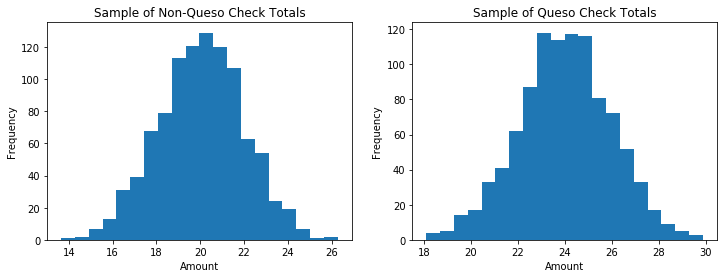

In [7]:
# Run this cell without changes
import pickle

# Load the sample data 
no_queso = pickle.load(open('data/no_queso.pkl', 'rb'))
queso = pickle.load(open('data/queso.pkl', 'rb'))

# Plot histograms

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

### Hypotheses and Errors

The restaurant owners want to know if customers who order queso spend **more or less** than customers who do not order queso.

### 2.1) Set up the null $H_{0}$ and alternative hypotheses $H_{A}$ for this test.

H_null = Customers do not spend more or less than customers who do not order queso. 
H_a = There is a difference in customers who order queso rather than not ordering queso. 

### 2.2) What does it mean to make `Type I` and `Type II` errors in this specific context?

A type I error means that it is believed that there is something there when really there is nothing. 
A type II error means that it is believe that nothing is there when really something is there. 
Within this context our type I would be H_null and type II would be H_a.

### Sample Testing

### 2.3) Run a statistical test on the two samples. Can you reject the null hypothesis? 

Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance.

You can use `scipy.stats` to find the answer if you like.  It has already been imported as `stats` and the statistical testing documentation can be found [here](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests).

In [8]:
# Code here 
from scipy.stats import stats
stats.ttest_ind(no_queso, queso)

Ttest_indResult(statistic=-45.16857748646329, pvalue=1.29670967092511e-307)

I'm not sure how I'm doing on time, but here I know that I need to do the following. 
1. from scipy.stats from stats
2. state the hypothesis
3. read in the proper data or arrays
4. conduct a ttest using stats.ttest_ind()
From here I can see my p-values conducted from this two tailed t test. I then compare them to my alpha and then circle back to what we were trying to test. 
If it was greater than my alpha than that means we fail to reject the null. If it is less than alpha we reject the null. 

---
## Part 3: Bayesian Statistics [Suggested time: 15 minutes]
---
### Bayes' Theorem

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a large, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

### 3.1) What is the probability of Thomas getting a small puppy?
Show your work, not just the final result

In [11]:
# Two events that need to be added
# P(small) = P(small|store) + P(small|pound) 
p_small=(.2*.6)+(.8*.1) 
p_small

0.2

### 3.2) Given that he got a large puppy, what is the probability that Thomas went to the pet store?
Show your work, not just the final result

In [12]:
# Code here to find the probability
#p(large|store) = p(store|large)*p(store)/p(large)
p_large_store = (.1*.2)/((.2*.1)+(.8*.55))
p_large_store

0.043478260869565216

### 3.3) Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
Show your work, not just the final result

I have produced the likelihood of Thomas getting a small puppy in 3.2. It is more likely that he will get a small puppy from the store. When separating the additive events we can see the the outcomes are not equal. Going to the store, Thomas has a 60% chance of getting a small dog that becomes a 16% chance from his overall store pick. Whereas if he goes to the pound he'll probably have a 10% chance, this becomes an 8% chance at the pound. This could be because there are smaller dogs at the pound but that's a big generalisation. 

### 3.4) For Question 3.2, what are the prior, posterior, and likelihood?

#p(large|store) = p(store|large)*p(store)/p(large)

The posterior is p(large|store)

The likelihood is p(store|large)

The prior is p(store)

The marginal even though it is not asked here is the p(large)

---
## Part 4: Linear Regression [Suggested Time: 10 min]
---

In this section, you'll be using the Advertising data, and you'll be creating linear models that are more complicated than a simple linear regression. The relevant modules have already been imported at the beginning of this notebook. We'll load and prepare the dataset for you below.

In [13]:
# Run this cell without changes

data = pd.read_csv('data/advertising.csv').drop('Unnamed: 0', axis=1)
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# I do not know whether I should create a y = m*x + b here. I have left it out and just realised it now as I'm looking over my work. 

In [14]:
# Run this cell without changes

X = data.drop('sales', axis=1)
y = data['sales']

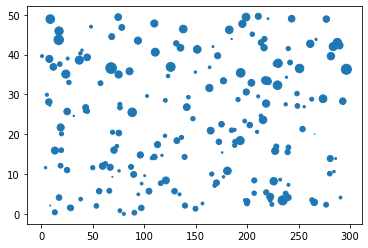

In [16]:
plt.scatter(data['TV'], data['radio'],data['newspaper'] )

In [19]:
from sklearn import linear_model 
regression = linear_model.LinearRegression()
regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
regression.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

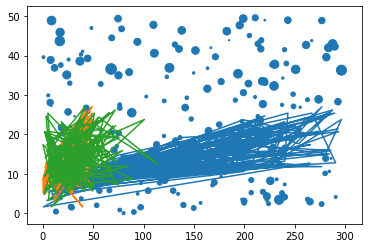

In [23]:
plt.plot(X,y, '-')
plt.scatter(data['TV'], data['radio'], data['newspaper'])

In the linear regression section of the curriculum, you analyzed how TV, Radio, and Newspaper spendings individually affected the Sales figures. Here, we'll use all three together in a multiple linear regression model!

### 4.1) Create a Correlation Matrix for `X`.

In [15]:
# Code here 
X.corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


### 4.2) Based on this correlation matrix only, would you recommend to use `TV`, `radio`, and `newspaper` in the same multiple linear regression model?


I would not suggest to use TV, radio and newsparer in the same multiple regression model. As we look at the X correlation we can see that the relationships with one another are not very strong because they are closer to 0 than 1. 

### 4.3) Use StatsModels' `ols`-function to create a multiple linear regression model with `TV`, `radio`, and `newspaper` as independent variables and `sales` as the dependent variable. 

**Required output:** the model summary of this multiple regression model.

In [26]:
# Code here 
X = sm.add_constant(X) # I don't have a constant so I've added one here. 
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           1.58e-96
Time:                        14:43:40   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4.4) Do we have any statistically significant coefficients? If the answer is yes, list them below.

Here, I am looking at the p value for the coefficients for TV, radio and newspaper. I can see that there is something very strange happening with newspaper compared to radio and TV. Usually we want something less than or greater than .05 (alpha) but I know that we had an example in class where the specific coefficient was far below, this indicated that there was something not normal happening.
Here we are looking at advertising sales. I know that we dropped sales. I would then say that newspapers are not doing well or they are not investing heavily in the advertising here. 